在这里就可以共享工作了~

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

matplotlib.rcParams['font.sans-serif']=['SimHei']   # 用黑体显示中文
matplotlib.rcParams['axes.unicode_minus']=False     # 正常显示负号
    
    
df1 = pd.read_csv("G:\A_美团BA大赛\code\data\\airbnbeasy\listings.csv")
# df1.info()
df2 = pd.read_csv("G:\A_美团BA大赛\code\data\listings.csv.gz")
df2 = df2.loc[:,['id','amenities','review_scores_rating']]
df = pd.merge(df1,df2,how = 'left')
df = df.drop('neighbourhood_group',axis=1)
df = df[-df['name'].isnull()]
df = df[-df['host_name'].isnull()]
# df.info()
# df.describe()

# 用均方差法找出价格异常值,标准差能反映一个数据集的离散程度
s = df['price']
# 序列中的价格和平均价格的差距
zscore = s - s.mean()
# 这里用3.5倍sigma
df['isOutlier'] = zscore.abs() > 3.5 * s.std()
# 输出异常的样本
df_out = df[df['isOutlier'] == True]
# print(df_out)
df = df[-df['isOutlier'] == True]
df = df.drop('isOutlier',axis = 1)

df = df.drop(df[df['price'] == 99999].index)
df = df.drop(df[df['price'] == 0].index)

ame_list = df['amenities'].tolist()
for i in range(df.shape[0]):
    ame_list[i] = list(ame_list[i].replace('"',"").replace('[',"").replace(']','').replace(' ','').split(','))
amenities = {}
for i in range(df.shape[0]):
    for amenity in ame_list[i]:
        if amenity in amenities:
            amenities[amenity] += 1
        else:
            amenities[amenity] = 1
    
# print(sorted(amenities.items(),key=lambda x:x[1],reverse = True))

ame_topfive = ['Longtermstaysallowed','Wifi','Airconditioning','Shampoo','Heating']
for ame_ in ame_topfive:
    df[ame_] = np.zeros([df.shape[0],1],dtype = 'int')

for i in range(df.shape[0]):
    for ame_ in ame_topfive:
         if (ame_ in ame_list[i]):
             df[ame_].iloc[i] = 1
         else:
             df[ame_].iloc[i] = 0
            
df.info()
    


In [ ]:
plt.hist(df['price'], bins=40, facecolor="blue", edgecolor="black", alpha=0.7)
# 显示横轴标签
plt.xlabel("每晚房价")
# 显示纵轴标签
plt.ylabel("频数")
# 显示图标题

plt.show()

plt.hist(df[df['price']<=4000]['price'], bins=10, facecolor="red", edgecolor="black", alpha=0.4)
# 显示横轴标签
plt.xlabel("每晚房价(元/晚)")
# 显示纵轴标签
plt.ylabel("频数")
# 显示图标题
plt.title("每晚房价低于4000元的房源价格")
plt.show()

In [ ]:
plt.hist(df['review_scores_rating'], bins=40, facecolor="blue", edgecolor="black", alpha=0.7)
# 显示横轴标签
plt.xlabel("Score")
# 显示纵轴标签
plt.ylabel("Frequency")
# 显示图标题
plt.title("Price Histogram")
plt.show()

plt.hist(df[df['review_scores_rating']>=80]['review_scores_rating'], bins=40, facecolor="blue", edgecolor="black", alpha=0.7)
# 显示横轴标签
plt.xlabel("Score")
# 显示纵轴标签
plt.ylabel("Frequency")
# 显示图标题
plt.title("Score Histogram | Score > 80")
plt.show()

In [ ]:
name_list = ['Shared room','Private room','Entire home/apt']
freq = [list(df['room_type']).count('Shared room'),list(df['room_type']).
        count('Private room'),list(df['room_type']).count('Entire home/apt')]
print(freq)
plt.barh(range(len(freq)), freq,tick_label = name_list)
plt.show()



In [ ]:
df_tmp = pd.DataFrame({'Shared room' : df['price'][df["price"] <= 1000][df['room_type'] =='Shared room'],
                       'Private room' : df['price'][df["price"] <= 1000][df['room_type']=='Private room'],
                       'Entire home/apt' : df['price'][df["price"] <= 1000][df['room_type']=='Entire home/apt'],
                      },columns = ['Shared room','Private room','Entire home/apt'])

df_tmp = pd.DataFrame({'Shared room' : df['price'][df["price"] <= 1000][df['room_type'] =='Shared room'],
                       'Private room' : df['price'][df["price"] <= 1000][df['room_type']=='Private room'],
                       'Entire home/apt' : df['price'][df["price"] <= 1000][df['room_type']=='Entire home/apt'],
                      },columns = ['Shared room','Private room','Entire home/apt'])

df_tmp.plot.hist(stacked = True, alpha = 0.5)
plt.xlabel("价格")
plt.ylabel("频数")
# df_tmp.plot.density(stacked = True, alpha=0.5)


In [ ]:
df_tmp1 = df.loc[:,['price','neighbourhood']]  
df_tmp1 = df_tmp1.groupby('neighbourhood').mean()


df_tmp = df_tmp1.sort_values('price',ascending = False)
print(df_tmp)
df_tmp.plot.barh()
# df_tmp.plot.pie(subplots = True)




In [ ]:
df_tmp2 = df.loc[:,['price','neighbourhood']]  
df_tmp2 = df_tmp2.groupby('neighbourhood').size().to_frame().reset_index()
df_tmp2.columns = ['neighbourhood','count']

df_tmp = df_tmp2.sort_values('count',ascending = False)[:10].reset_index().drop('index',axis=1)
print(df_tmp)
df_tmp.plot.barh(x='neighbourhood',y='count')


In [ ]:
df_tmp4 = df.loc[:,['price','neighbourhood']]
dir = set(df['neighbourhood'].tolist())
dir = list(dir)
#print(dir)
#df_tmp4.groupby('neighbourhood').boxplot()
for i in range(len(dir)):
    plt.figure(i)
    df_tmp = np.log(df['price'][df['neighbourhood'] == dir[i]])
    df_tmp.plot.box(patch_artist=True,xlabel='',boxprops = {'color':'orangered','facecolor':'pink'})
    plt.ylim(3,12)
    plt.xlabel(dir[i])
    plt.ylabel("对数变换后的价格")  
    #plt.savefig(str(dir[i]).replace('/','')+'.jpg', format='png', dpi=300)





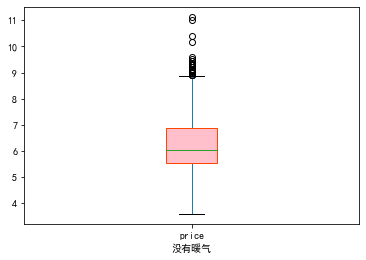

In [128]:

df_tmp = np.log(df['price'][df['Heating'] == 0])
df_tmp.plot.box(patch_artist=True,xlabel='',boxprops = {'color':'orangered','facecolor':'pink'})
plt.xlabel('没有暖气')
plt.savefig('Noheating.jpg', format='png', dpi=300)



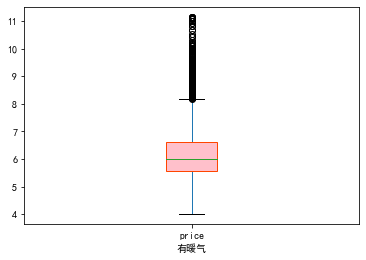

In [129]:
df_tmp = np.log(df['price'][df['Heating'] == 1])
df_tmp.plot.box(patch_artist=True,xlabel='',boxprops = {'color':'orangered','facecolor':'pink'})
plt.xlabel('有暖气')
plt.savefig('Heating.jpg', format='png', dpi=300)

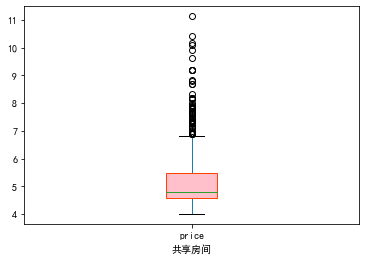

In [130]:
df_tmp = np.log(df['price'][df['room_type'] == 'Shared room'])
df_tmp.plot.box(patch_artist=True,xlabel='',boxprops = {'color':'orangered','facecolor':'pink'})
plt.xlabel('共享房间')
plt.savefig('Sharedroom.jpg', format='png', dpi=300)


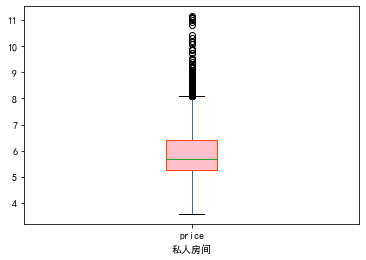

In [133]:
df_tmp = np.log(df['price'][df['room_type'] == 'Private room'])
df_tmp.plot.box(patch_artist=True,xlabel='',boxprops = {'color':'orangered','facecolor':'pink'})
plt.xlabel('私人房间')
plt.savefig('Privateroom.jpg', format='png', dpi=300)

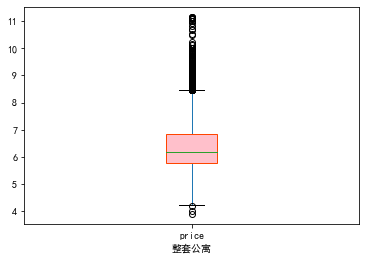

In [134]:
df_tmp = np.log(df['price'][df['room_type'] == 'Entire home/apt'])
df_tmp.plot.box(patch_artist=True,xlabel='',boxprops = {'color':'orangered','facecolor':'pink'})
plt.xlabel('整套公寓')
plt.savefig('Entire.jpg', format='png', dpi=300)

In [ ]:
df_tmp3 = pd.merge(df_tmp1,df_tmp2,on='neighbourhood')
print(df_tmp3)

df_tmp3[:8].plot.bar(x='neighbourhood',width = 0.8,stacked = False, alpha = 0.5)
#plt.yticks(np.linspace(0,8000,1000))
plt.ylim(0,8000)
plt.xlabel("城区")
plt.legend(labels=['价格','房源数'],loc='best')

df_tmp3[8:].plot.bar(x="neighbourhood",width = 0.8,stacked = False, alpha = 0.5)
plt.xlabel("城区")
plt.legend(labels=['价格','房源数'],loc='best')
#df_tmp3.plot.density(stacked = True, alpha=0.5)


In [ ]:
subsets=['price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']
#箱型图，获取数据大致分布情况，查看离群点信息
fig,axes=plt.subplots(len(subsets),1,figsize=(20,10))
plt.subplots_adjust(hspace=1)
for i,subset in enumerate(subsets):
    sns.boxplot(df[subset],ax=axes[i],whis=2,orient='h')


In [ ]:
#探索性数据分析，数据集中性
def get_con(df):
    subsets=['price','latitude','longitude']
    data={}
    for i in subsets:
        data.setdefault(i,[])
        data[i].append(df[i].skew())
        data[i].append(df[i].kurt())
        data[i].append(df[i].mean())
        data[i].append(df[i].std())
        data[i].append(df[i].std()/df[i].mean())
        data[i].append(df[i].max()-df[i].min())
        data[i].append(df[i].quantile(0.75)-df[i].quantile(0.25))
        data[i].append(df[i].median())
        data[i].append(df[i].min())
        data[i].append(df[i].max())
    data_df=pd.DataFrame(data,index=['偏度','峰度','均值','标准差','变异系数','极差','四分位距','中位数','最小值','最大值'],columns=subsets)
    return data_df.T
df2=get_con(df)
df2

In [ ]:
df.describe()